In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('range_only_analysis_corrected.csv')
# Split the dataset based on 'LLM' and 'expType'
df_gpt_viz_no_choices = df[(df['LLM'] == 'ChatGPT') & (df['expType'] == 'reVLAT_Viz+NoChoices')]
df_gpt_no_viz_no_choices = df[(df['LLM'] == 'ChatGPT') & (df['expType'] == 'reVLAT_NoViz+NoChoices')]
df_gemini_viz_no_choices = df[(df['LLM'] == 'Gemini') & (df['expType'] == 'reVLAT_Viz+NoChoices')]
df_gemini_no_viz_no_choices = df[(df['LLM'] == 'Gemini') & (df['expType'] == 'reVLAT_NoViz+NoChoices')]  # Added this line


In [3]:
# Columns to check for NA values before plotting
columns_to_check = ['percentage_overlap', 'jaccard_index', 'sorensen_dice_coefficient', 'overlap_coefficient']

# Filter out rows where any of the specified columns are NA for each split
filtered_dfs = [
    df_gpt_viz_no_choices.dropna(subset=columns_to_check),
    df_gpt_no_viz_no_choices.dropna(subset=columns_to_check),
    df_gemini_viz_no_choices.dropna(subset=columns_to_check),
    df_gemini_no_viz_no_choices.dropna(subset=columns_to_check)  # Added this line
]

# Names for each dataframe for titles in plots
names = ["GPT Viz+NoChoices", "GPT NoViz+NoChoices", "Gemini Viz+NoChoices", "Gemini NoViz+NoChoices"]  # Updated this line

plt.style.use('seaborn-paper')

C:\Users\FAN\AppData\Local\Temp\ipykernel_46068\4030344886.py:44: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.4)


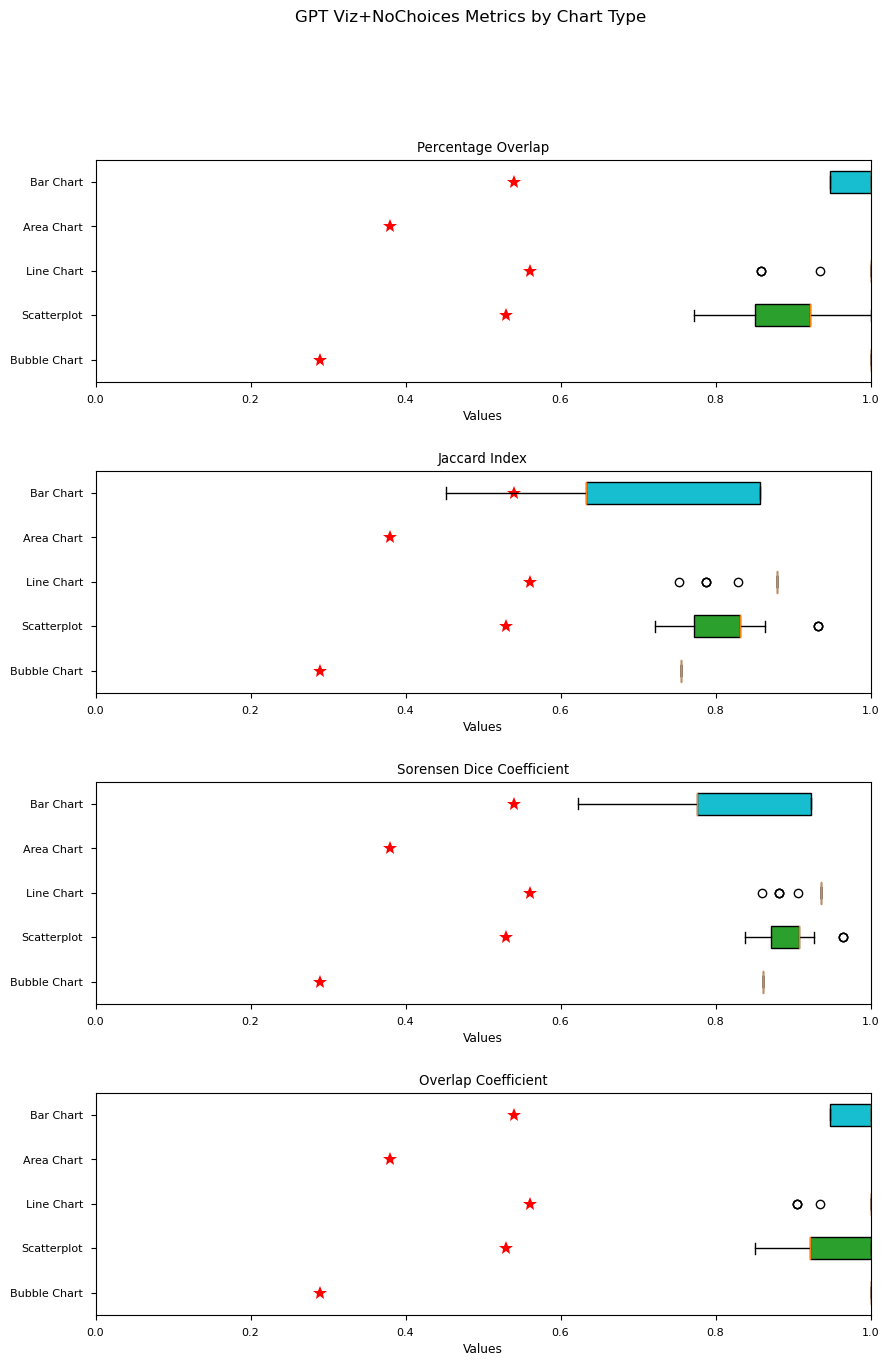

C:\Users\FAN\AppData\Local\Temp\ipykernel_46068\4030344886.py:44: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.4)


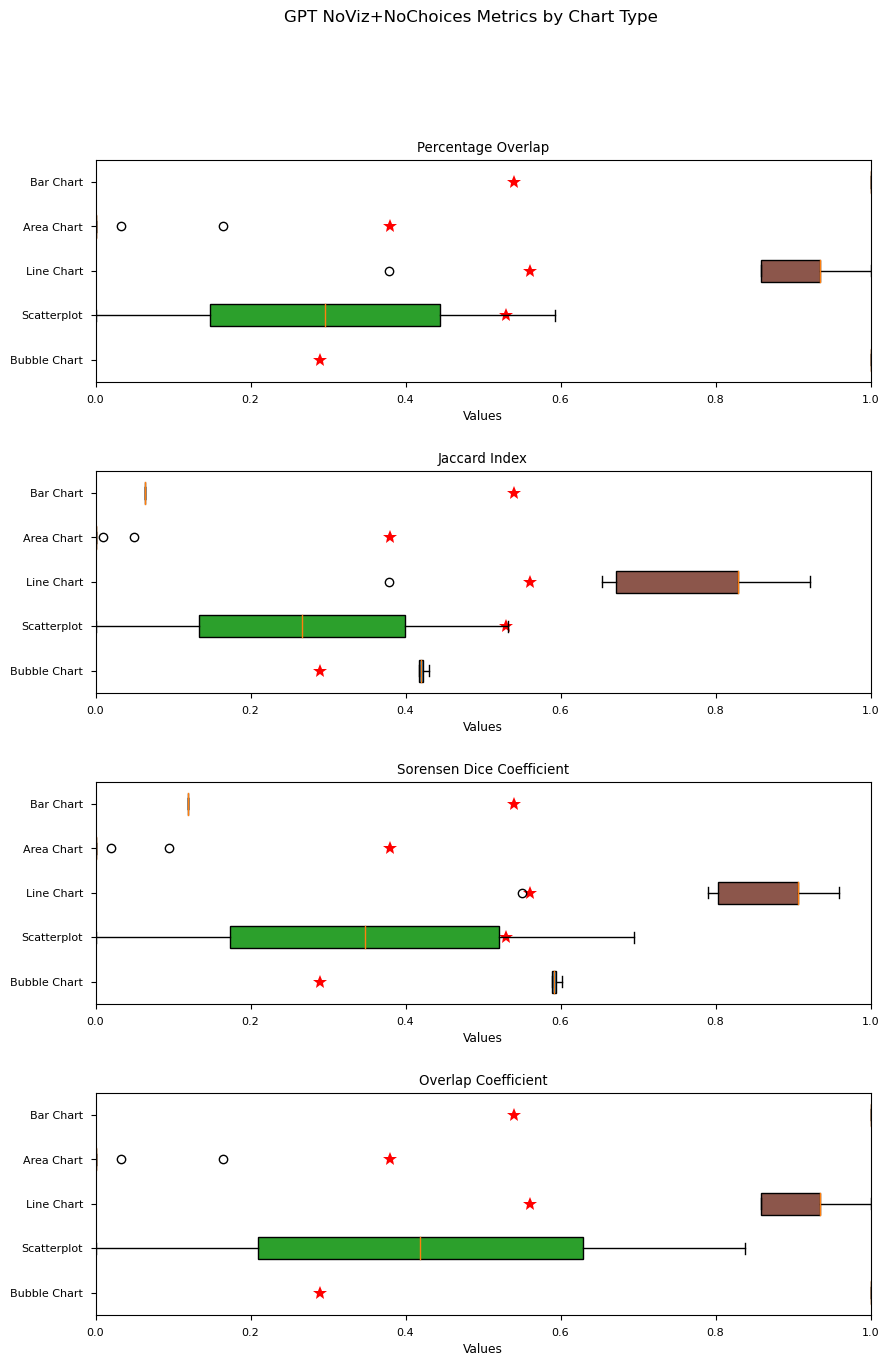

C:\Users\FAN\AppData\Local\Temp\ipykernel_46068\4030344886.py:44: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.4)


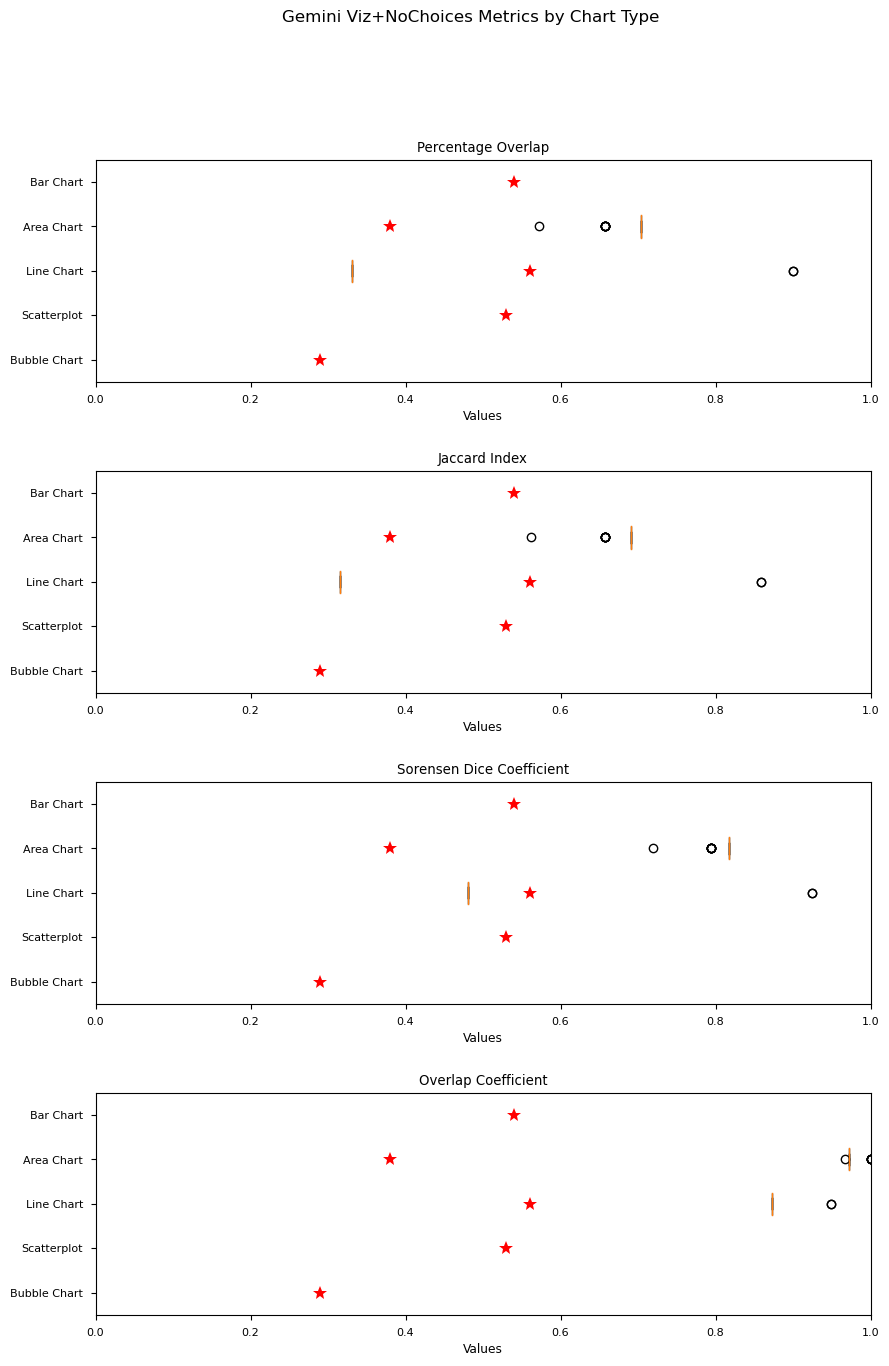

C:\Users\FAN\AppData\Local\Temp\ipykernel_46068\4030344886.py:44: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.4)


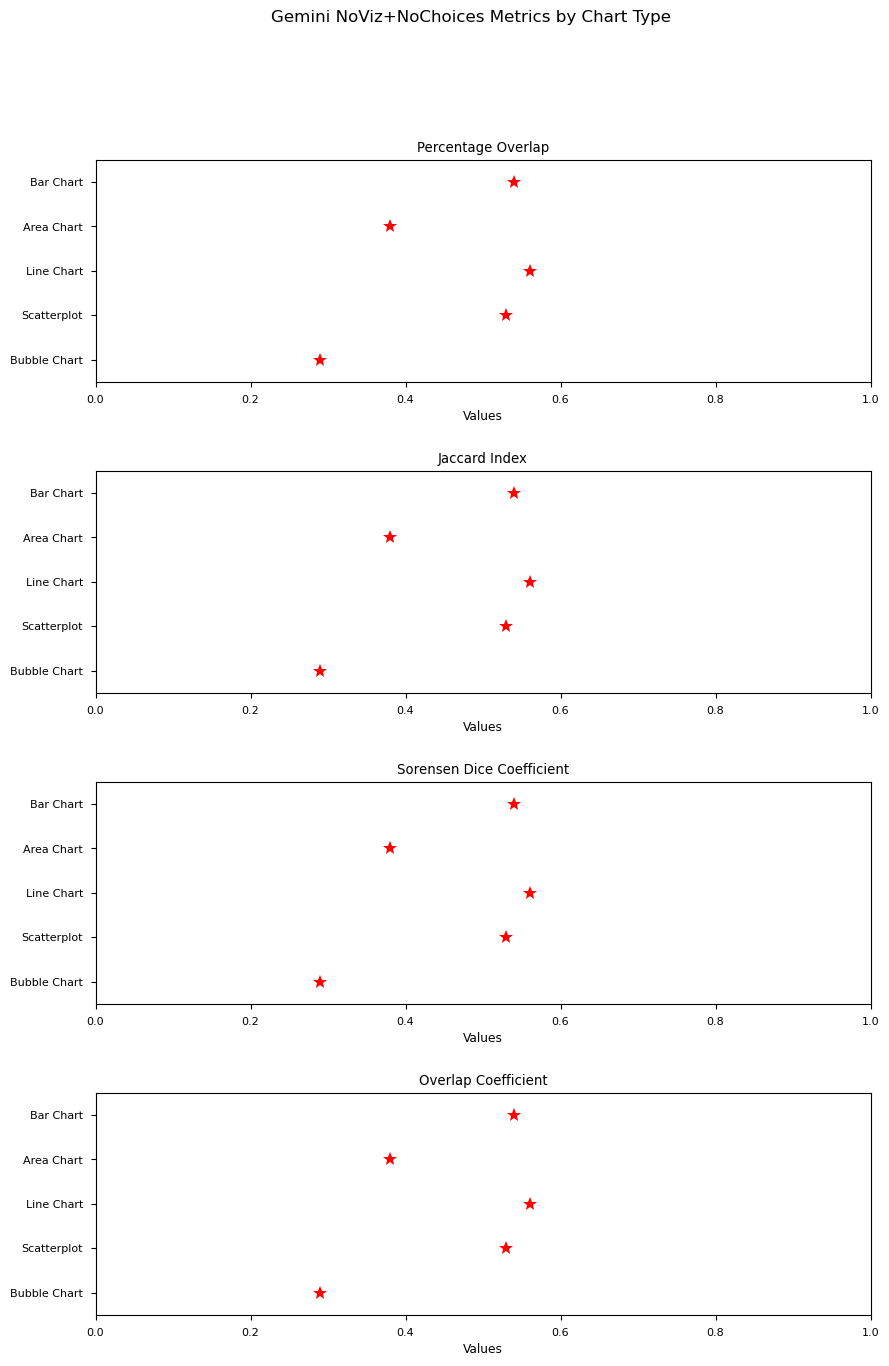

In [5]:

# Assuming 'df', 'columns_to_check', and 'filtered_dfs' are already defined and loaded as per your previous context

# Define the consistent order of chart types
chart_types_ordered = ["Bubble Chart", "Scatterplot", "Line Chart", "Area Chart", "Bar Chart"]

# Updated function to generate box and whisker plots with standardized x-axis limits
def plot_box_and_whiskers_transposed_with_accuracy(df, chart_types_ordered, title, human_accuracy):
    fig, axs = plt.subplots(nrows=len(columns_to_check), ncols=1, figsize=(10, 15), constrained_layout=True)
    metrics_title = ['Percentage Overlap', 'Jaccard Index', 'Sorensen Dice Coefficient', 'Overlap Coefficient']
    colors = plt.cm.get_cmap('tab10', len(chart_types_ordered))
    
    # Dictionary mapping chart types to their human accuracy
    accuracy_dict = {
        "Line Chart": 0.56,
        "Bar Chart": 0.54,
        "Scatterplot": 0.53,
        "Area Chart": 0.38,
        "Bubble Chart": 0.29,
    }

    for i, column in enumerate(columns_to_check):
        data = []
        for j, chart_type in enumerate(chart_types_ordered):
            if chart_type in df['chartType'].unique():
                chart_data = df[df['chartType'] == chart_type][column].dropna()
            else:
                chart_data = [np.nan]  # Use NaN to create empty plot for missing chart types
            data.append(chart_data)
            # Add a red star marker for human accuracy
            if chart_type in accuracy_dict:
                axs[i].plot(accuracy_dict[chart_type], j + 1, 'r*', markersize=10)

        bp = axs[i].boxplot(data, vert=False, patch_artist=True, labels=chart_types_ordered)

        for patch, color in zip(bp['boxes'], colors.colors):
            patch.set_facecolor(color)

        axs[i].set_title(metrics_title[i])
        axs[i].set_xlabel('Values')
        axs[i].tick_params(axis='y', which='major', labelsize=8)
        axs[i].set_xlim(0, 1)  # Standardize x-axis limits

    plt.suptitle(title)
    plt.subplots_adjust(hspace=0.4)
    plt.show()

# Example usage of the updated function with one of the dataframes
# Replace 'df' with your specific DataFrame variable name and 'filtered_dfs' & 'names' as per your dataset context
for df_split, name in zip(filtered_dfs, names):
    plot_box_and_whiskers_transposed_with_accuracy(df_split, chart_types_ordered, f"{name} Metrics by Chart Type", human_accuracy=None)